### Parte I: Análisis de la base de hogares y tipo de ocupación

#### 2-Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base. Esto es, a la base de la encuesta individual de cada año (que usaron en el TP3) unan la base de la encuesta de hogar. Asegúrese de estar usando las variables CODUSU y NRO_Hogar para el merge

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
EPH2024H = pd.read_excel('usu_hogar_T124.xlsx')
EPH2004H = pd.read_stata("Hogar_t104.dta")

EPH_completo_I = pd.read_csv('respondieron_limpio.csv')

C:\Users\gabri\AppData\Local\Temp\ipykernel_4252\3308375638.py:4: DtypeWarning: Columns (2,15,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  EPH_completo_I = pd.read_csv('respondieron_limpio.csv')


In [300]:
EPH2004H.columns = EPH2004H.columns.str.lower()
EPH2024H.columns = EPH2024H.columns.str.lower()

EPH2024BSH=EPH2024H[(EPH2024H["aglomerado"] == 32) | (EPH2024H["aglomerado"] == 33)]
EPH2004BSH=EPH2004H[(EPH2004H["aglomerado"] == "Ciudad de Buenos Aires") | (EPH2004H["aglomerado"] == "Partidos del GBA")]

In [301]:
EPH_completo_H= pd.concat([EPH2004BSH, EPH2024BSH], ignore_index=True)
EPH_completo_H

,codusu,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,...,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph,pondih
0,125098,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,Departamento,...,,04,1.0,0.0,98.0,0.0,0.0,0.0,00000,NaN
1,125397,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,Departamento,...,,00,1.0,0.0,98.0,0.0,0.0,0.0,00000,NaN
2,125515,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,Departamento,...,,05,1.0,0.0,98.0,0.0,0.0,0.0,00010,NaN
3,125558,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,Departamento,...,,06,2.0,0.0,3.0,4.0,0.0,0.0,00000,NaN
4,125599,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1471.0,Casa,...,,02,2.0,0.0,1.0,0.0,0.0,0.0,00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,TQRMNOPSSHKMROCDEIJAH00861731,1.0,1,2024.0,1,1,S,33,3772.0,1,...,NaN,10,1,0,96,0,0,0,NaN,5211.0
4892,TQRMNOPWVHJLSSCDEIJAH00794914,1.0,1,2024.0,1,1,S,33,1862.0,1,...,NaN,2,4,2,98,0,0,0,NaN,4520.0
4893,TQRMNOQQWHKMOQCDEIJAH00861732,1.0,1,2024.0,1,1,S,33,2639.0,1,...,NaN,12,2,0,98,0,0,0,NaN,0.0
4894,TQRMNOSXRHKMNMCDEIJAH00861733,1.0,1,2024.0,1,1,S,33,1497.0,2,...,NaN,10,1,0,98,0,0,0,NaN,2000.0


In [302]:
# Suponiendo que tienes dos DataFrames: EPH_completo_I y EPH_completo_H

# Obtener los nombres de las columnas de ambos DataFrames
columnas_I = set(EPH_completo_I.columns)
columnas_H = set(EPH_completo_H.columns)
columnas_merge = set(["codusu", "nro_hogar"]) #mergeamos las dos columnas 

# Encontrar las columnas que comparten
columnas_comunes = columnas_I.intersection(columnas_H)

# Mostrar las columnas que comparten
print("Columnas comunes en ambos DataFrames:")
print(columnas_comunes)

columnas_interes = columnas_comunes - columnas_merge
columnas_interes = sorted(list(columnas_interes))

Columnas comunes en ambos DataFrames:
{'nro_hogar', 'gdeccfr', 'ano4', 'rdecifr', 'deccfr', 'adecifr', 'gdecifr', 'adeccfr', 'codusu', 'pondera', 'decifr', 'ipcf', 'aglomerado', 'rdeccfr', 'itf'}


In [303]:
EPH_completo = pd.merge(EPH_completo_I, EPH_completo_H, on=["codusu", "nro_hogar"], suffixes=('_I', '_H'))


#### 3-Limpien la base de datos tomando criterios que hagan sentido. Explicar cualquier decisión como el tratamiento de valores faltantes (missing values), extremos (outliers), o variables categóricas. Justifique sus decisiones

In [304]:
#revisamos si los valores duplicados tienen sentido:

for i in columnas_interes: #resto a ver si es el mismo valor
    valor_i = i + "_I"
    valor_h = i + "_I"
    resta = EPH_completo[valor_i] - EPH_completo[valor_h]

    for x in resta:
        if x != 0: 
            print("Existe una diferencia entre " + valor_i + " y " + valor_h + ": " + x)
    
    nan_check = resta.isna().sum()

    print("cantidad de nan en la resta de "+ i + ": " + str(nan_check))

cantidad de nan en la resta de adeccfr: 0
cantidad de nan en la resta de adecifr: 0
cantidad de nan en la resta de aglomerado: 0
cantidad de nan en la resta de ano4: 0
cantidad de nan en la resta de deccfr: 0
cantidad de nan en la resta de decifr: 0
cantidad de nan en la resta de gdeccfr: 0
cantidad de nan en la resta de gdecifr: 0
cantidad de nan en la resta de ipcf: 0
cantidad de nan en la resta de itf: 0
cantidad de nan en la resta de pondera: 0
cantidad de nan en la resta de rdeccfr: 0
cantidad de nan en la resta de rdecifr: 0


In [305]:
#Missing values
#Aca nos fijamos cuantos valores hay con no NaN
print(EPH_completo_H.info())
print('Dimensión de la base:', EPH_completo.shape, '\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 89 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codusu      4896 non-null   object 
 1   nro_hogar   4896 non-null   float64
 2   realizada   4896 non-null   object 
 3   ano4        4896 non-null   float64
 4   trimestre   4896 non-null   object 
 5   region      4896 non-null   object 
 6   mas_500     4896 non-null   object 
 7   aglomerado  4896 non-null   object 
 8   pondera     4896 non-null   float64
 9   iv1         4896 non-null   object 
 10  iv1_esp     2355 non-null   object 
 11  iv2         4896 non-null   object 
 12  iv3         4896 non-null   object 
 13  iv3_esp     2353 non-null   object 
 14  iv4         4896 non-null   object 
 15  iv5         4896 non-null   object 
 16  iv6         4896 non-null   object 
 17  iv7         4896 non-null   object 
 18  iv7_esp     2356 non-null   object 
 19  iv8         4896 non-null  

In [306]:
#NaN 
#Vemos los NaN en cada columna
for i in EPH_completo.columns:
    if EPH_completo[i].isna().sum()>0:
        print("Columna con NaN:", i, EPH_completo[i].isna().sum())
        

Columna con NaN: iv1_esp 5634
Columna con NaN: iv3_esp 5641
Columna con NaN: iv7_esp 5618
Columna con NaN: ii7_esp 5627
Columna con NaN: ii8_esp 5479
Columna con NaN: ix_men10 3976
Columna con NaN: idecifr 5643
Columna con NaN: pdecifr 5643
Columna con NaN: ideccfr 5643
Columna con NaN: pdeccfr 5643
Columna con NaN: idimph 5643
Columna con NaN: pondih 7366


In [307]:
EPH_completo["iv1_esp"].value_counts()
#Esta columna tiene 7350 valores NaN y 25 completados. No vale la pena agrupar, ni mantener la columna.   
#print()

iv1_esp
                                                 7350
casilla                                             8
VIV EN VILLA                                        7
VILLA                                               6
VIVIENDA EN LUGAR DE TRABAJO                        2
VIVIENDA EN UN DEPOSITO                             1
Casillo                                             1
Name: count, dtype: int64

In [308]:
EPH_completo["iv3_esp"].value_counts()

iv3_esp
                                                 7361
FKEXIPLAS                                           5
NADA                                                1
parket                                              1
Name: count, dtype: int64

In [309]:
EPH_completo["iv7_esp"].value_counts()

iv7_esp
                                                 7347
VECINO                                              7
carga los tachos                                    7
 LE DA UN VECINO                                    5
Camion de Agua                                      5
TANQUE COMUNITARIO                                  5
SE LO DA VECINO DE UNA BOMBA                        4
no tiene                                            4
no especifica                                       4
COMPRESOR                                           3
Name: count, dtype: int64

In [310]:
EPH_completo["ii7_esp"].value_counts() ##ii7 es suficiente, explica mas 

ii7_esp
                                                 7345
PRENDADO PAGAN CUOTAS                               5
PERTENECE ASUS PADRES QUE VIVEN EN PB.              5
EN SUCESION                                         4
bien de familia                                     4
es del papa de los hijos                            3
casa tomada                                         3
EN COMODATO                                         3
la vivienda esta a nombre de sus hijos y usuf       2
FAMILIAR DE SUS ABUELOS                             2
ES DUEñA DE LA MITAD                                1
CEDIDO A SUS HIJAS CON CLAUSULA DE USO HASTA        1
HERENCIA                                            1
LA EMP LE PAGA EL ALQUILER Y TODOS LOS GASTOS       1
no dice                                             1
no responde                                         1
Name: count, dtype: int64

In [311]:
EPH_completo["ii8_esp"].value_counts() #capaz conviene juntar electricidad

ii8_esp
                                                 7348
electricidad                                      101
electrico                                          15
NO TIENEN USAN EL DEL VECINO                       10
ELECTRICIDAD                                       10
ELECTRICO                                           7
Electricidad                                        6
Electrico                                           5
electrica                                           5
ELECTRICIDAD                                        3
cocina electrica                                    3
Cocina electrica                                    2
cocina en otra vivienda                             2
Electrica                                           2
COMPRA COMIDA HECHA                                 2
ELECTRICA                                           2
ELECTRICA                                           1
NO TIENE COCINA                                     1
NADA,COME ABAJO     

In [312]:
EPH_completo["ix_men10"].value_counts() #es numerica
#Para ver de donde vienen los NaN
EPH_completo[EPH_completo["ano4_H"]==2004]["ix_men10"].value_counts()

#Se puede asumir que los NaN son 0 en 2004 porque no hay en la columna (no le podemos preguntar a la persona). Es poco probable
## que haya personas sin hijos en la muestra

EPH_completo["ix_men10"]=EPH_completo["ix_men10"].fillna(0) #llenamos de ceros a los NaN

In [313]:
print(EPH_completo["idecifr"].value_counts()) #no la usamos
print(EPH_completo["pdecifr"].value_counts()) #los aglomerados que usamos son >500.000, no se usa, la volamos
print(EPH_completo["ideccfr"].value_counts()) #no se usa
print(EPH_completo["pdeccfr"].value_counts()) #no se usa
print(EPH_completo["idimph"].value_counts()) #los NaN estan porque en 2024 no se pregunta. No lo usamos, bye
print(EPH_completo["pondih"].value_counts()) #no esta en 2004, pero si en 2024. No lo usamos

idecifr
    7366
Name: count, dtype: int64
pdecifr
    7366
Name: count, dtype: int64
ideccfr
    7366
Name: count, dtype: int64
pdeccfr
    7366
Name: count, dtype: int64
idimph
00000    5702
10000    1016
00010     226
00100     115
11000      94
10010      74
10100      64
01000      37
11100      16
10110       6
11010       6
00110       4
01100       3
01010       3
Name: count, dtype: int64
pondih
0.0        1638
8403.0       14
1861.0       13
2358.0       12
21006.0      11
           ... 
2662.0        1
1411.0        1
3829.0        1
2547.0        1
3977.0        1
Name: count, Length: 1416, dtype: int64


In [314]:
#Outliers #Quiero ver las variables numericas, por eso uso EPH_completo_H
dt = EPH_completo_H.describe().T
print(dt.to_string())

             count           mean            std     min     25%     50%       75%          max
nro_hogar   4896.0       1.042279       1.021550     1.0     1.0     1.0       1.0        51.00
ano4        4896.0    2014.396242       9.993167  2004.0  2004.0  2024.0    2024.0      2024.00
pondera     4896.0    1878.282680     858.623786    42.0  1428.0  1673.0    2145.0      8685.00
ii3_1       4896.0       0.073529       0.273266     0.0     0.0     0.0       0.0         3.00
ii5_1       4896.0       0.007149       0.099795     0.0     0.0     0.0       0.0         2.00
ii6_1       4896.0       0.009804       0.108410     0.0     0.0     0.0       0.0         3.00
ix_tot      4896.0       3.002042       1.750294     1.0     2.0     3.0       4.0        15.00
ix_men10    3320.0       0.615361       0.886071     0.0     0.0     0.0       1.0         7.00
ix_mayeq10  4896.0       2.584763       1.391703     1.0     2.0     2.0       3.0        14.00
itf         4896.0  231093.796569  77527

In [315]:


#nro_hogar,año y pondera estan ok, no nos importan para el modelo
#ii3_1 no nos importa para el modelo, es condicional
#ii5_1 no nos importa para el modelo, es condicional
#ii6_1 solo esta en 2004 (VEEER)
#ix_tot ver que el maximo es 15 y en el cuartil 0.75 el valor es 4 (ver si se saca o no y si se usa)
#ix_men10 capaz. Ver, no parece afectar tanto el max
# ix_mayeq10 capaz.Ver porque el max 14.
# itf ver de sacar el maximo porque es muy alto y tira el promedio para arriba
# ipcf idem arriba. USAMOS ESTE      
# pondih no importa, no lo usamos

<Axes: xlabel='ch06'>

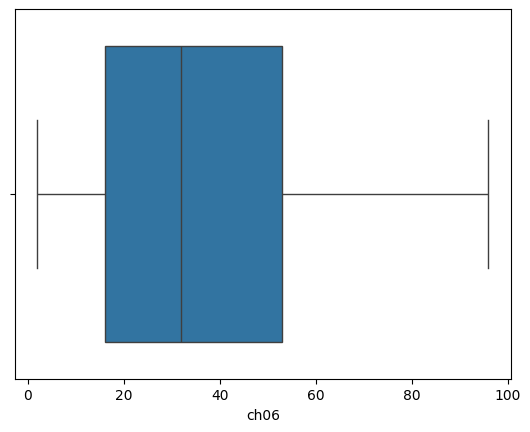

In [316]:
#Busquemos outliers en las variables que usamos anteriormente
#CH06
sns.boxplot(x=EPH_completo["ch06"]) 
#Esta ok, no hay outliers


<Axes: xlabel='ch09'>

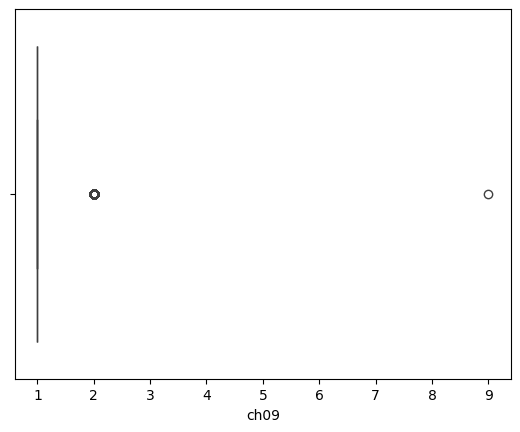

In [317]:
#CH06
sns.boxplot(x=EPH_completo["ch09"]) 
#ver hacer variable binaria

<Axes: xlabel='ch15'>

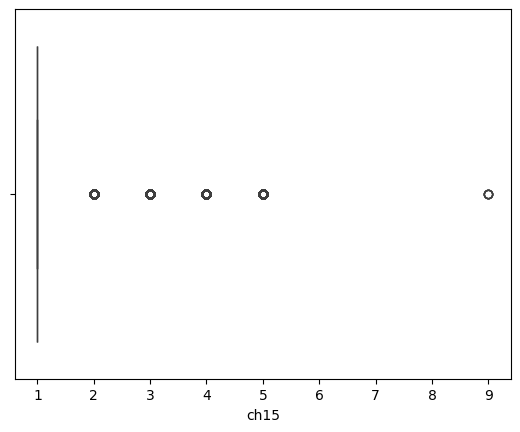

In [318]:
sns.boxplot(x=EPH_completo["ch15"]) 
#

<Axes: xlabel='ipcf_I'>

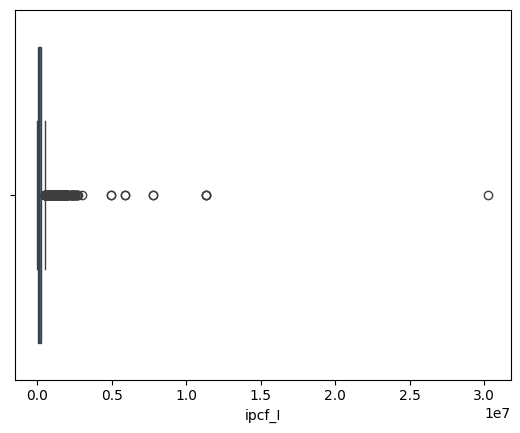

In [319]:
sns.boxplot(x=EPH_completo["ipcf_I"]) 
#Outilier feo feo
#Elinamos

1688


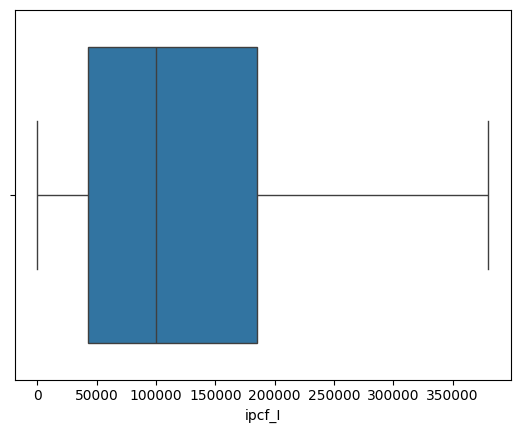

In [320]:

mediana=EPH_completo["ipcf_I"].median()

EPH_completo["median"]=mediana

#Calculo el MAD
EPH_completo["Distancia Mediana"] = np.abs(EPH_completo["ipcf_I"] - EPH_completo["median"] ) #Calculo la distancia absoluta a la mediana según el subgrupo
mediana=EPH_completo["Distancia Mediana"].median()

EPH_completo["MAD"]=mediana

EPH_completo_limpio = EPH_completo[EPH_completo["ipcf_I"] <= EPH_completo["median"] + EPH_completo["MAD"] * 3]


EPH_completo_limpio= EPH_completo_limpio[EPH_completo_limpio["ipcf_I"] >= EPH_completo_limpio["median"] - EPH_completo_limpio["MAD"] * 3]

sns.boxplot(x=EPH_completo_limpio["ipcf_I"]) 

print(len(EPH_completo) - len(EPH_completo_limpio))

In [321]:
#Seleccion de variables HOGAR para ver cual usamos 

#Caracteristicas de la vivienda
#IV1 (tipo de vivienda por observacion entrevistador),
#IV2(# de ambientes), 
#IV3 (piso),  
#IV4 (TECHO), 
#IV6 (acceso a agua), 
#IV8 (baño, letrina), 
#IV11 (si tiene cloacas), 
#iv12_1 (cerca de basurales), 
#iv12_2 (zona inundable), 
#iv12_3 (villa de emergencia)

#Caracteristicas del hogar
#ii1 (preguntar, ambientes exclusivos para vivienda)
#ii2 (ambientes para dormir)
#ii4_1 (si tiene cocina)
#ii7 (regimen de tenencia)
#ii8 (combustible utilizado para cocinar) --> meter un valor y unificar electricidad
#ii9 (baño tenencia) veer si la dejamos

#Estrategias del hogar (chusmear despues por # de personas que viven en la casa y rango etario)
#v1 (vivir con ingresos del trabajo)
#v2 (ingresos jubilacion)
#v3 (indemnizacion por despido)
#v5 (subsidio social) 
#v7 (que te den mercaderia personas fuera del hogar) ver
#v12 (idem arriba pero con plata)
#v13 (de lo que tenia ahorrado)
#v14 (prestamos a familiares y amigos)
#v15 (prestamos con bancos)
#v16 (compras en cuotas)
#v17 (vender pertenencias)

#Resumen del hogar
#IX_tot (# de miembros del hogar)
#IX_men10 (idem <10)
#IX_mayeq10 (idem >10)
#IPCF (monto de ingreso per capita familiar)
#VII1_1 (si tiene empleada dosmetica)


785


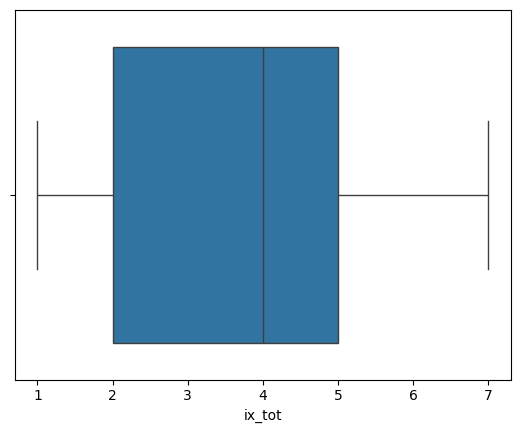

In [322]:
#sns.boxplot(x=EPH_completo["ix_tot"]) 
mediana=EPH_completo["ix_tot"].median()

EPH_completo["median"]=mediana

#Calculo el MAD
EPH_completo["Distancia Mediana"] = np.abs(EPH_completo["ix_tot"] - EPH_completo["median"] ) #Calculo la distancia absoluta a la mediana según el subgrupo
mediana=EPH_completo["Distancia Mediana"].median()

EPH_completo["MAD"]=mediana

EPH_completo_limpio = EPH_completo[EPH_completo["ix_tot"] <= EPH_completo["median"] + EPH_completo["MAD"] * 3]


EPH_completo_limpio= EPH_completo_limpio[EPH_completo_limpio["ix_tot"] >= EPH_completo_limpio["median"] - EPH_completo_limpio["MAD"] * 3]

sns.boxplot(x=EPH_completo_limpio["ix_tot"]) 

print(len(EPH_completo) - len(EPH_completo_limpio))

<Axes: xlabel='ix_mayeq10'>

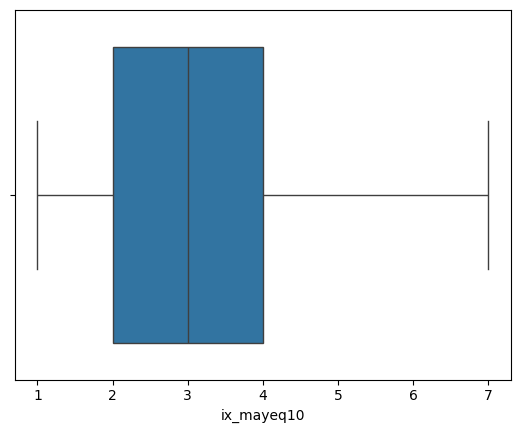

In [323]:
sns.boxplot(x=EPH_completo_limpio["ix_mayeq10"]) 

<Axes: xlabel='ix_men10'>

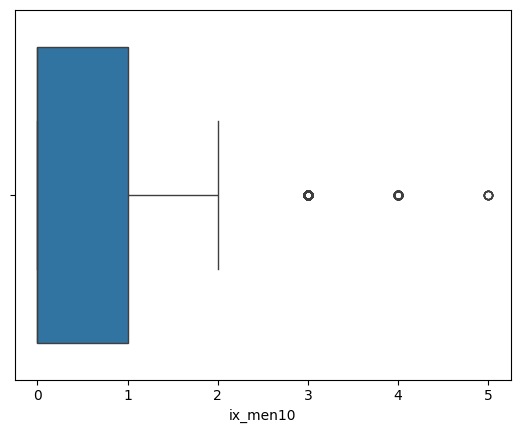

In [324]:
sns.boxplot(x=EPH_completo_limpio["ix_men10"]) 

#### Mapeo

In [325]:
#Caracteristicas de la vivienda
#IV2(# de ambientes),  --> Tiene un 99 ??


mapeo_IV1 = {
    'Casa': 1,
    'Departamento': 2,
    'Pieza de inquilinato': 3,
    'Pieza en hotel/pensión': 4,
    'local no construido para habitación': 5,
    'Otro':6
}

mapeo_IV3 = {
    'Mosaico/baldosa/madera/cerámica/alfombra': 1,
    'Cemento/ladrillo fijo': 2,
    'Ladrillo suelto/tierra': 3,
    'Otro': 4,
}

mapeo_IV4 = {
    'Membrana/cubierta asfáltica': 1,
    'Baldosa/losa sin cubierta': 2,
    'Pizarra/teja': 3,
    'Chapa de metal sin cubierta': 4,
    'Chapa de fibrocemento/plástico': 5,
    'Chapa de cartón':6,
    'N/S. Depto. de propiedad horizontal':9,
}

mapeo_IV6 = {
    'Por cañería dentro de la vivienda': 1,
    'Fuera de la vivienda pero dentro del terreno': 2,
    'Fuera del terreno': 3,
}

mapeo_IV11 = {
    'A red pública (cloaca)': 1,
    'A cámara séptica y pozo ciego': 2,
    'Sólo a pozo ciego': 3,
    'A hoyo/excavación en la tierra': 4,
    'Ns/Nr':9,
}

mapeo_SN = {
    'Sí': 1,
    'No': 2,
    'Ns./Nr.':9
}

#Caracteristicas del hogar
#ii1 (preguntar, ambientes exclusivos para vivienda) --> Algunos con más de 10
#ii7 (regimen de tenencia) --> Hay una que dice en relacion de dependencia
#ii9 (baño tenencia) veer si la dejamos
mapeo_II7 = {
    'Propietario de la vivienda y el terreno': 1,
    'Propietario de la vivienda solamente': 2,
    'Inquilino/arrendatario de la vivienda': 3,
    'Ocupante por pago de impuestos/expensas': 4,
    'Ocupante en relación de dependencia': 5,
    'Ocupante gratuito (con permiso)':6,
    'Ocupante de hecho (sin permiso)':7,
    'Está en sucesión': 8,
    'Otra situación': 9
}

mapeo_II8 = {
    'Gas de red': 1,
    'Gas de tubo/garrafa': 2,
    'Kerosene/leña/carbón': 3,
    'Otro': 4
}

mapeo_II9 = {
    'Uso exclusivo del hogar': 1,
    'Compartido con otro/s hogar/es de la misma vivienda': 2,
    'Compartido con otra/s vivienda/s': 3,
    'No tiene baño': 4
}


In [326]:
EPH_completo_limpio['iv1'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV1.get(row['iv1'], row['iv1']) 
    if row['ano4_I'] == 2004 else row['iv1'], axis=1)
EPH_completo_limpio['iv3'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV3.get(row['iv3'], row['iv3']) 
    if row['ano4_I'] == 2004 else row['iv3'], axis=1)
EPH_completo_limpio['iv4'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV4.get(row['iv4'], row['iv4']) 
    if row['ano4_I'] == 2004 else row['iv4'], axis=1)
EPH_completo_limpio['iv6'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV6.get(row['iv6'], row['iv6']) 
    if row['ano4_I'] == 2004 else row['iv6'], axis=1)
EPH_completo_limpio['iv8'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['iv8'], row['iv8']) 
    if row['ano4_I'] == 2004 else row['iv8'], axis=1)
EPH_completo_limpio['iv11'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV11.get(row['iv11'], row['iv11']) 
    if row['ano4_I'] == 2004 else row['iv11'], axis=1)
EPH_completo_limpio['iv12_1'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['iv12_1'], row['iv12_1']) 
    if row['ano4_I'] == 2004 else row['iv12_1'], axis=1)
EPH_completo_limpio['iv12_2'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['iv12_2'], row['iv12_2']) 
    if row['ano4_I'] == 2004 else row['iv12_2'], axis=1)
EPH_completo_limpio['iv12_3'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['iv12_3'], row['iv12_3']) 
    if row['ano4_I'] == 2004 else row['iv12_3'], axis=1)
EPH_completo_limpio['ii4_1'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['ii4_1'], row['ii4_1']) 
    if row['ano4_I'] == 2004 else row['ii4_1'], axis=1)
EPH_completo_limpio['ii7'] = EPH_completo_limpio.apply(
    lambda row: mapeo_II7.get(row['ii7'], row['ii7']) 
    if row['ano4_I'] == 2004 else row['ii7'], axis=1)
EPH_completo_limpio['ii8'] = EPH_completo_limpio.apply(
    lambda row: mapeo_II8.get(row['ii8'], row['ii8']) 
    if row['ano4_I'] == 2004 else row['ii8'], axis=1)
EPH_completo_limpio['ii9'] = EPH_completo_limpio.apply(
    lambda row: mapeo_II9.get(row['ii9'], row['ii9']) 
    if row['ano4_I'] == 2004 else row['ii9'], axis=1)
EPH_completo_limpio['ii9'] = EPH_completo_limpio.apply(
    lambda row: mapeo_II9.get(row['ii9'], row['ii9']) 
    if row['ano4_I'] == 2004 else row['ii9'], axis=1)

for i in range(1,19):
    columna = "v" + str(i)
    EPH_completo_limpio[columna] = EPH_completo_limpio.apply(
        lambda row: mapeo_SN.get(row[columna], row[columna]) 
        if row['ano4_I'] == 2004 else row[columna], axis=1)

In [327]:
#Añadimos la opcion de cocina electrica a II8:
EPH_completo_limpio['ii8'] = EPH_completo_limpio.apply(
    lambda row: 5 if 'elec' in str(row['ii8_esp']).lower()
    else row['ii8'], axis=1)

In [328]:
#Variables categoricas
# Notamos que origin es una variable categórica (toma valores 1, 2, 3)

# Usaremos one-hot encoding para transformar la columna categórica llamada origin 
# en varias columnas binarias (dummies).
# Cómo? get_dummies 
#origin_dummies = pd.get_dummies(auto['origin'], prefix='origin')

# Concatenamos con el df original
#auto_d = pd.concat([auto, origin_dummies], axis=1)
#auto_d.head()
#cuando tenemos una categorica en r no tenes que decir nada (ajusta n-1 parametros --> genera 3 columnas con dummies (001))

#### 4-Construya variables (mínimo 3) que no estén en la base pero que sean relevantes para predecir individuos desocupados (por ejemplo, la proporción de personas que trabajan en el hogar).

In [329]:

# de habitaciones / # de personas en el hogar
EPH_completo_limpio['HpP'] = EPH_completo_limpio.apply(
    lambda row: row['ix_tot'] / row['ii1'] if row['ii1'] > 0 else 0, axis=1
)


#proporcion de personas que trabajan en el hogar

# Filtrar las personas que trabajan (estado == 1)
trabajadores = EPH_completo_limpio[EPH_completo_limpio['estado'] == 1]

# Agrupar por 'codusu' y 'nro_hogar' y contar la cantidad de personas (codusu) que trabajan en cada combinación
trabajadores_hogar = trabajadores.groupby(['codusu', 'nro_hogar'])['estado'].count()

# Unir esta información al DataFrame original
EPH_completo_limpio = EPH_completo_limpio.merge(trabajadores_hogar, on=['codusu', 'nro_hogar'], how='left', suffixes=('', '_trabajadores'))

# Si hay combinaciones sin trabajadores (NaN), reemplazamos con 0
EPH_completo_limpio['estado_trabajadores'].fillna(0, inplace=True)
EPH_completo_limpio.rename(columns={'estado_trabajadores': 'trabajadores_hogar'}, inplace=True)


#Cantidad de dinero familiar entre cantidad de niños

EPH_completo_limpio['ipcf_niño'] = EPH_completo_limpio.apply(
    lambda row: row['ipcf_I'] / row['ix_men10'] if row['ix_men10'] > 0 else 0, axis=1
)

C:\Users\gabri\AppData\Local\Temp\ipykernel_4252\3005483485.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  EPH_completo_limpio['estado_trabajadores'].fillna(0, inplace=True)


In [330]:
EPH_completo_limpio['trabajadores_hogar']

0        0.0
1        1.0
2        0.0
3        3.0
4        3.0
        ... 
12219    3.0
12220    3.0
12221    3.0
12222    1.0
12223    0.0
Name: trabajadores_hogar, Length: 12224, dtype: float64

#### 5-Presenten estadísticas descriptivas de tres variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir la desocupación. Comenten las estadísticas obtenidas.

### Parte II: Clasificación y regularización